<a href="https://colab.research.google.com/github/SamanthKumar25/HelloWorld/blob/master/Haberman_Survival_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from google.colab import files
files = files.upload()

Saving haberman.csv to haberman (1).csv


In [ ]:
haber = pd.read_csv("haberman.csv")
haber.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [ ]:
print(haber.shape)

(306, 4)


Dataset has 4 features consistig of 306 Rows of data

In [ ]:
print(haber.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


Features of dataset are age, year, nodes, status

In [ ]:
print(haber['status'].value_counts())

1    225
2     81
Name: status, dtype: int64


Out of 306 patients 225 people are survived and 81 are demised. So data set is imbalanced

#Objective
The dataset contain information about breast cancer patients who were under gone surgery between 1958 and 1969. It contains information about age of patients, no. of axil nodes, year of operation and survival status. We need to analyze whether the features have effect on survival status, where Survival status of '1' being Survived past 5 years after the surgery and '2' being demisal with in 5 years of surgery.

#Uni-variate Analysis
* PDF
* CDF
* Box Plot
* Violin Plot

#PDF

PDF of Age

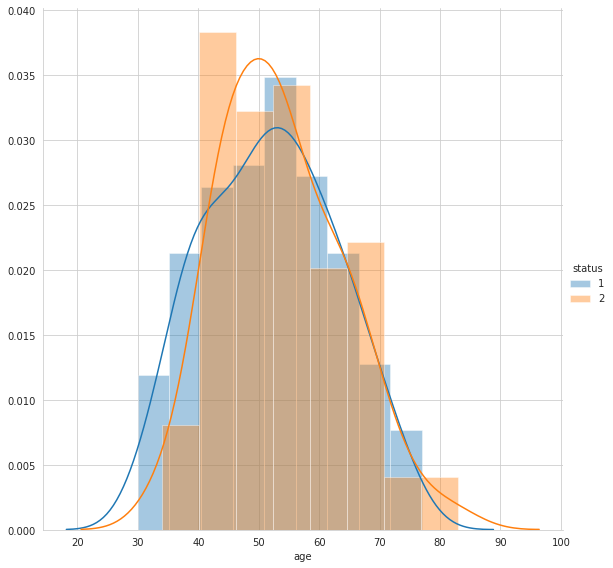

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(haber, hue="status", height=8).map(sns.distplot, "age").add_legend();
plt.show()

**Observations**
* PDF of feature age is heavily overlapped 
* Patients between ages 40 to 62 have high chances of survival rate.
* Similarly between ages 40 to 58 also have high chances of death rate.
* Can not draw clear conclusions on basis of age


PDF of Year

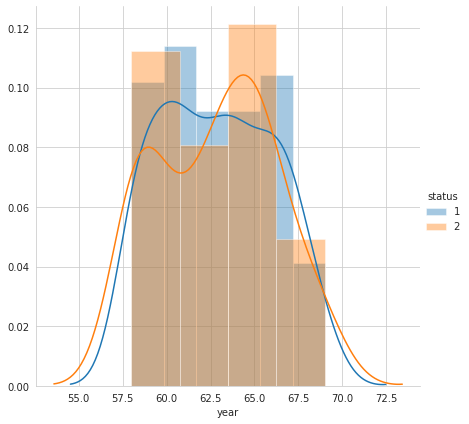

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(haber, hue="status", height=6).map(sns.distplot, "year").add_legend();
plt.show()

**Observations**
* PDF of feature year is heavily overlapped 
* More patients had surgery between 1963 and 1966 are expired with in 5 years of surgery.
* Patients who had surgery between 1960 and 1962 have survived 5 years past surgery.
* Can not draw clear conclusions on basis of year

PDF of Nodes

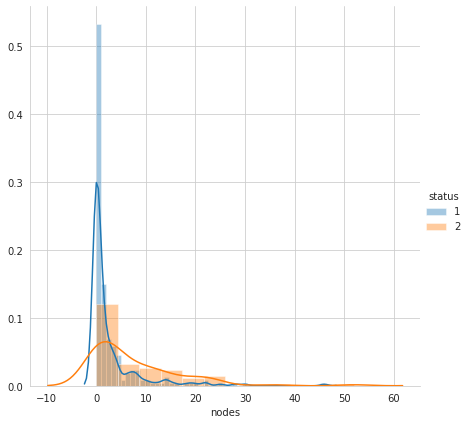

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(haber, hue="status", height=6).map(sns.distplot, "nodes").add_legend();
plt.show()

**Observations**
* Most people who lived more than 5 years of surgery have less than 10 nodes.
* People who are expired with in 5 years of surgery mostly have 0 to 25  nodes.
* In some rare cases people with 45 nodes are survived and people with 0 nodes are also expired.
* Nodes feature can be useful than other two(age,year) features.

#CDF

CDF of Age

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


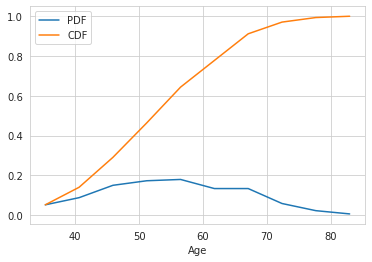

In [ ]:
counts, bin_edges=np.histogram(haber['age'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:],cdf,label='CDF')
plt.xlabel("Age")
plt.legend()
plt.show()



**Observations**


CDF of Nodes

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


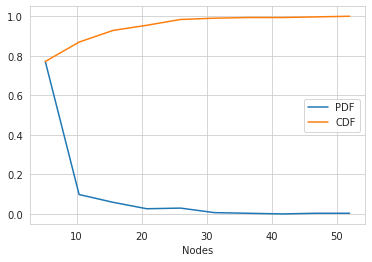

In [ ]:
counts,bin_edges=np.histogram(haber['nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:],cdf,label='CDF')
plt.xlabel("Nodes")
plt.legend()
plt.show()



#Box Plot

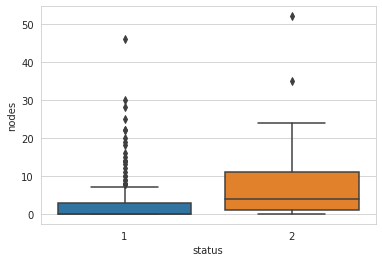

In [ ]:
sns.boxplot(x="status", y="nodes", data=haber)
plt.show()

**Observations**
* The Box plot of survived people shows 50th percentile of nodes are below 5 but some nodes are above 10 as well.
* The Box plot of expired people shows 75 percentile of peopel have less tha 12 nodes.

#Violin Plot

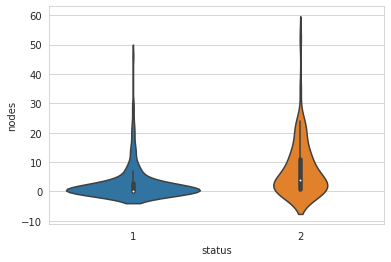

In [ ]:
sns.violinplot(x="status", y="nodes", data=haber)
plt.show()

#Bi-variate Analysis

* 2D Scatter Plot
* Pair Plot  

#2D Scatter Plot


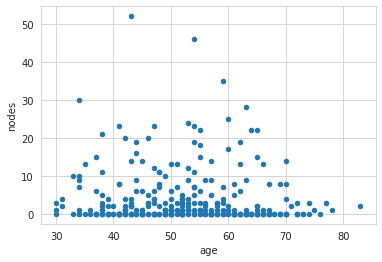

In [ ]:
haber.plot(kind="scatter", x="age", y="nodes" )
plt.show()

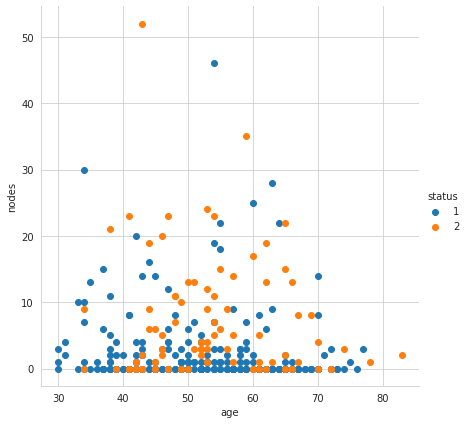

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(haber, hue="status", height=6).map(plt.scatter, "age", "nodes").add_legend();
plt.show()
plt.close()

**Observations**
* Most people between ages 30 to 40 have survived after 5 years of surgery.
* Maximum number of nodes in case of survived person is around 46 and in case of expired person is around 52
* Most people who are expired are between ages of 40 and 70.

#Pair Plot

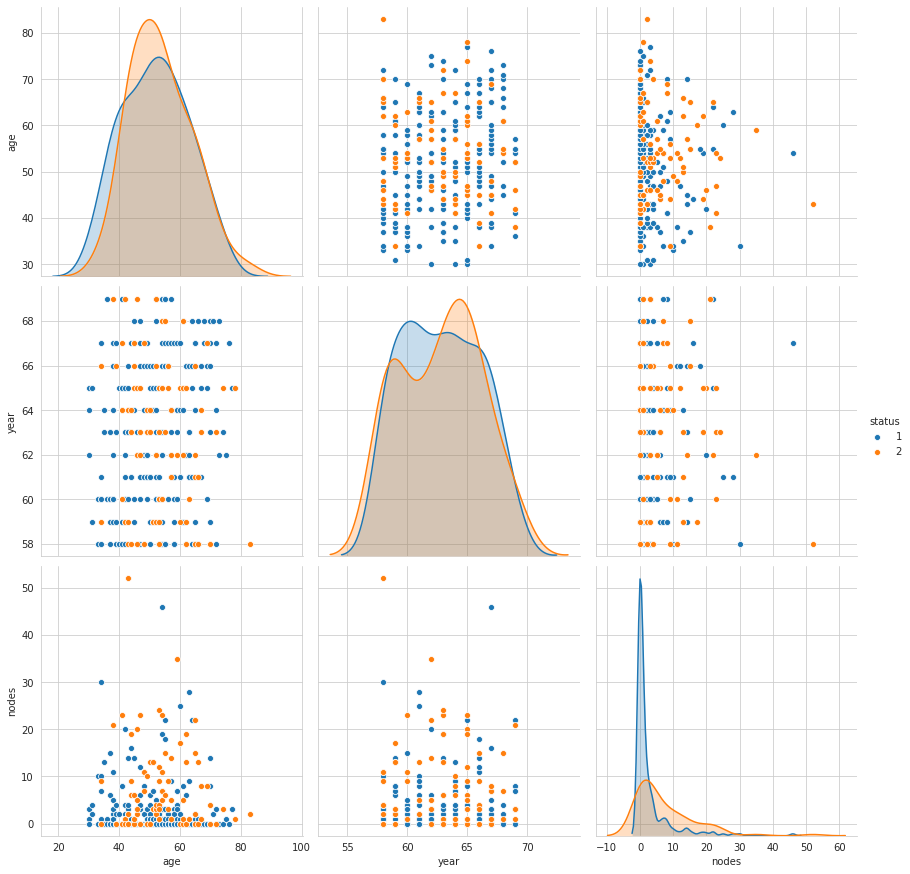

In [ ]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haber, hue="status",height=4);
plt.show()

**Observations**

* Data points are highly overlapped in every plot and are not linearly seperable.
* Node vs Age and Node vs Node are the useful plots.
* Age vs Year and Node vs Year plots have high overlapped data.
* From Age vs Node plot we can say "Most People with nodes less than 15 and age under 40 have survived 5 years after surgery"
* People with age between 40 and 70 have nodes from 0 to 25 mostly.
